In [65]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [66]:
# Load Generated Dataset (From DataGenerator_v5)
print("Reading CSV...")
df = pd.read_csv('../../dataset_grouped_by_month.csv')
print("Done!")

Reading CSV...
Done!


In [67]:
df2 = df.copy()
df2 = df2.drop(df2.columns.difference(['timeFrom','TotalParkings']), axis=1)

df2 = df2.set_index('timeFrom')
pd.to_datetime(df2.index, errors='ignore')
df2

,TotalParkings
timeFrom,
01-2013,16451
02-2013,15459
03-2013,19934
04-2013,18548
05-2013,19552
06-2013,17890
07-2013,18877
08-2013,13972
09-2013,20518


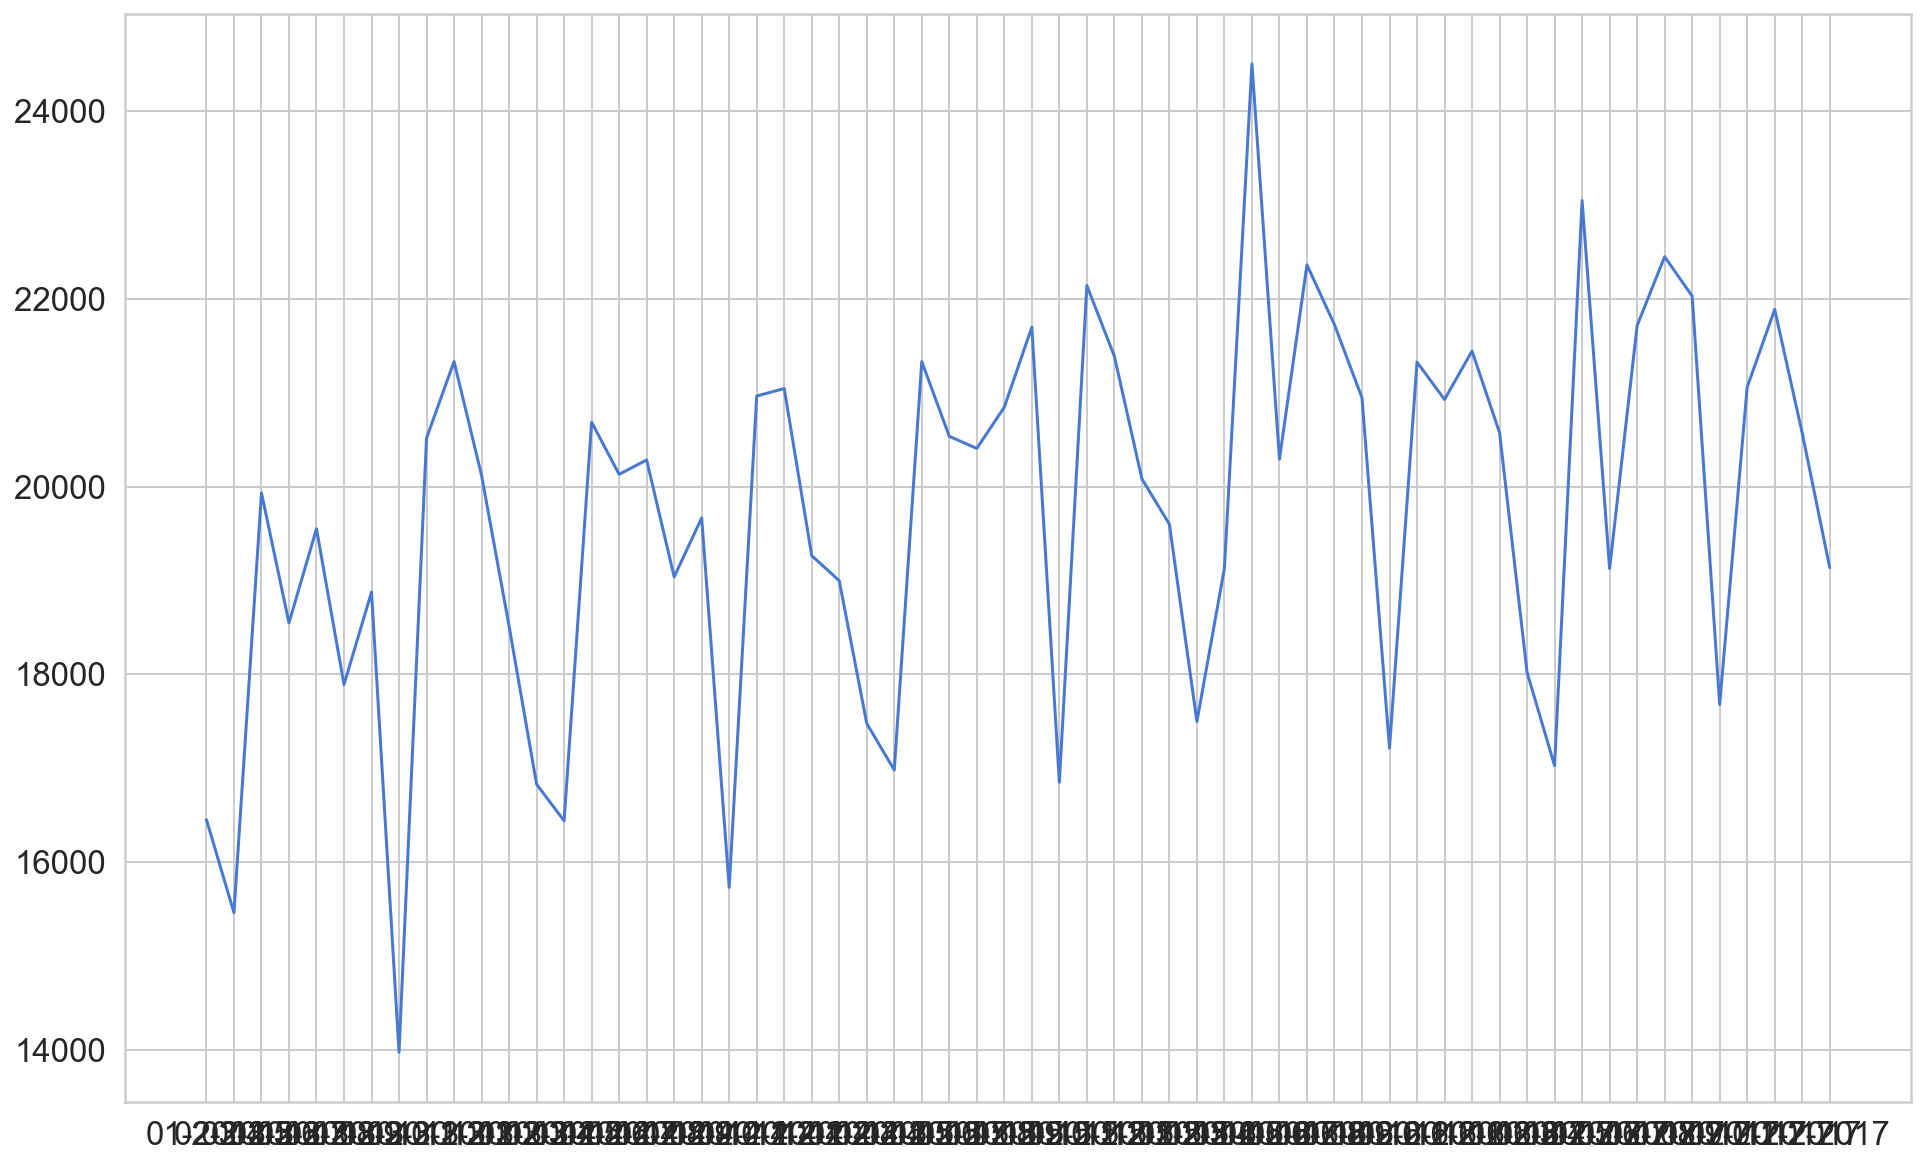

In [68]:
plt.plot(df2)

In [77]:
train_size = int(len(df2) * 0.9)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df)]
print(len(train), len(test))

54 6


In [78]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [83]:
time_steps = 2

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.TotalParkings, time_steps)
X_test, y_test = create_dataset(test, test.TotalParkings, time_steps)

print(X_train.shape, y_train.shape)

(52, 2, 1) (52,)


In [84]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [85]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 46 samples, validate on 6 samples
Epoch 1/30
46/46 [==============================] - 2s 39ms/sample - loss: 391476148.8696 - val_loss: 414563840.0000
Epoch 2/30
46/46 [==============================] - 0s 348us/sample - loss: 391473241.0435 - val_loss: 414560800.0000
Epoch 3/30
46/46 [==============================] - 0s 348us/sample - loss: 391470333.2174 - val_loss: 414557824.0000
Epoch 4/30
46/46 [==============================] - 0s 348us/sample - loss: 391467426.7826 - val_loss: 414554784.0000
Epoch 5/30
46/46 [==============================] - 0s 348us/sample - loss: 391464510.6087 - val_loss: 414551808.0000
Epoch 6/30
46/46 [==============================] - 0s 348us/sample - loss: 391461583.3043 - val_loss: 414548896.0000
Epoch 7/30
46/46 [==============================] - 0s 348us/sample - loss: 391458697.7391 - val_loss: 414545888.0000
Epoch 8/30
46/46 [==============================] - 0s 370us/sample - loss: 391455799.6522 - val_loss: 414542848.0000
Epoch 9/30
46/

In [86]:
y_pred = model.predict(X_test)

y_pred

array([[2.648711],
       [2.648711],
       [2.648711],
       [2.648711]], dtype=float32)